# Homework 5. Pandas - Titanic

***Double Click here to edit this cell***

- Name: 서다원
- Student ID: 202001707
- Submission date: 2022.05.20

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic = pd.read_csv('titanic_dataset.csv')

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- name: Name 
- sex: {'male', 'female'} 
- age: Age
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
- boat: boat # of survived passengers

## Some Exercises

### You should find pandas functions by googling or from pandas reference manual

In [ ]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [ ]:
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [ ]:
titanic.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [ ]:
titanic[['boat']].head(10)

,boat
0,2
1,11
2,NaN
3,NaN
4,NaN
5,3
6,10
7,NaN
8,D
9,NaN


In [ ]:
titanic[titanic['boat'].notnull()]['boat'].value_counts().sort_index()

1           5
10         29
11         25
12         19
13         39
13 15       2
13 15 B     1
14         33
15         37
15 16       1
16         23
2          13
3          26
4          31
5          27
5 7         2
5 9         1
6          20
7          23
8          23
8 10        1
9          25
A          11
B           9
C          38
C D         2
D          20
Name: boat, dtype: int64

Remove all passengers who were in more than one boat. They are unclear data.

In [ ]:
exactly_one = lambda x: len(str(x).strip().split()) == 1

titanic[(titanic['boat'].notnull()) & titanic['boat'].apply(exactly_one)]['boat'].value_counts().sort_index()

1      5
10    29
11    25
12    19
13    39
14    33
15    37
16    23
2     13
3     26
4     31
5     27
6     20
7     23
8     23
9     25
A     11
B      9
C     38
D     20
Name: boat, dtype: int64

## Problem 1. Find mean fare that the first class passengers paid (5 pts)
- Note that there are many unpaid free passengers. They are out of consideration.
- 1 pound when Titanic launched is worth 57.5 US dollars. 
- Suppose US currency exchange ratio is 1,280 won per dollar.
- Before printing, truncate to two decimal places

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)
df = df[df.fare != 0] #unpaid는 제외
mean_data = df.groupby(['pclass']).mean() #pclass 기준 mean 계산하기
#print(mean_data)

mean_fare_1class = round(mean_data.loc[1, 'fare'] * 57.5 * 1280, 2) #1 pound = 57.5 dollars, 1 dollar = 1280 won
print('mean fare that the first class passengers paid = ', mean_fare_1class)

mean fare that the first class passengers paid =  6583334.67


```
mean fare that the first class passengers paid = 6583334.67
```

## Problem 2. (15 pts)
### 2.1 Find the **name**s who paid the highest **fare**. Are they **survived**?

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)
highest_fare = df['fare'].max() #최고 높은 요금
highest_fare_data = df[df.fare == highest_fare] #최고 높은 요금을 가진 데이터 행(중복이 있어도 ok)
print(highest_fare_data[['name','survived']].sort_index()) #최고 높은 요금 가진 데이터들의 이름과 생존여부

                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1


```
                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1
```

### 2.2 Find the **name**s who paid the lowest **fare**. Are they **survived**?

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)
lowest_fare = df['fare'].min() #최고 낮은 요금
lowest_fare_data = df[df.fare == lowest_fare] #최고 낮은 요금을 가진 데이터 행(중복이 있어도 ok)
print(lowest_fare_data[['name','pclass','survived']].sort_index()) #최고 낮은 요금 가진 데이터들의 이름과 생존여부

                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963     

```
                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963                     Leonard, Mr. Lionel       3         0
1254           Tornquist, Mr. William Henry       3         1
```

### 2.3 Find the **name**s who paid the lowest **fare** (> 0). Are they **survived**?

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)
df = df[df.fare != 0] #0 fare 인 사람은 제외
lowest_fare = df['fare'].min() #최고 낮은 요금
lowest_fare_data = df[df.fare == lowest_fare] #최고 낮은 요금을 가진 데이터 행(중복이 있어도 ok)
print(lowest_fare_data[['name','pclass','survived']].sort_index()) #최고 낮은 요금 가진 데이터들의 이름과 생존여부

                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1


```
                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1
```

## Problem 3. (10 pts)
### 3.1 Find the survival ratio of the passengers who paid more than 0 and less than or equal to the mean fare of third class

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)
df = df[df.fare != 0] #unpaid는 제외
mean_data = df.groupby(['pclass']).mean() #pclass 기준 mean 계산하기
mean_fare_3class = mean_data.loc[3, 'fare'] # 3 third class 평균 fare
df = df[df.fare <= mean_fare_3class] # 3 third class 평균 fare 보다 낮은 요금을 낸 데이터만 남기기
survived = df['survived'].mean() #survived 값의 평균
print('survival ratio of low 1 group = ',round(survived*100,2),'%')

survival ratio of low 1 group =  25.33 %


```
survival ratio of low 1 group = 25.33%
```

### 3.2 Find the survival ratio of the passengers who paid more than the mean fare of first class

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)
mean_data = df.groupby(['pclass']).mean() #pclass 기준 mean 계산하기
mean_fare_1class = mean_data.loc[1, 'fare'] # 1 third class 평균 fare
df = df[df.fare > mean_fare_1class] # 1 third class 평균 fare 보다 높은 요금을 낸 데이터만 남기기
survived = df['survived'].mean() #survived 값의 평균
print('survival ratio of low 1 group = ',round(survived*100,2),'%')

survival ratio of low 1 group =  72.16 %


```
survival ratio of high 1 group = 72.16%
```

## Problem 4. (10 pts)
### 4.1 Plot the number of male and female passengers

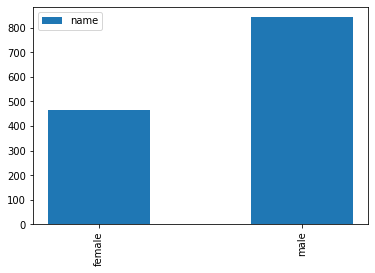

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
df = pd.DataFrame(titanic)

female_df = df[df.sex == 'female'] #female 만 있는 df
male_df = df[df.sex == 'male'] #male 만 있는 df

x_data = ['female', 'male']
y_data = [len(female_df),len(male_df)]
plt.bar(x_data,y_data, width=0.5,label='name')
plt.xticks(rotation=90)
plt.legend()
plt.show()

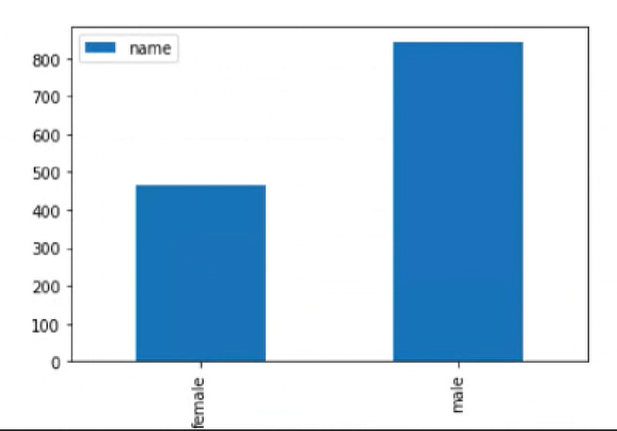

### 4.2 Plot mean age and mean fare by sex

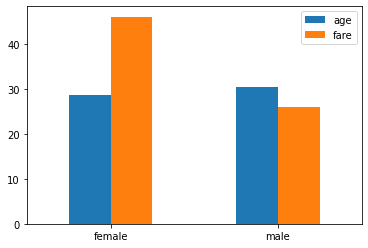

In [ ]:
# YOUR CODE HERE
import numpy as np

df = pd.DataFrame(titanic)

female_df = df[df.sex == 'female'] #female 만 있는 df
male_df = df[df.sex == 'male'] #male 만 있는 df

df = pd.DataFrame({'age': [female_df.age.mean(),male_df.age.mean()],
                   'fare':[female_df.fare.mean(),male_df.fare.mean()]}, index=['female','male'])
df.plot.bar(rot=0)
plt.show()

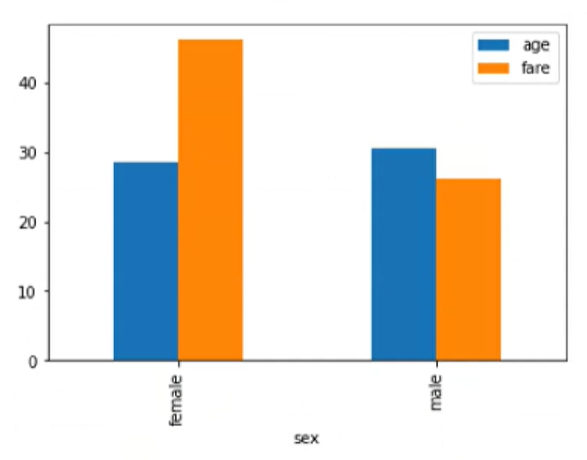

## Problem 5. (10 pts)
### 5.1 Find the number of passengers by passenger's title.

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)

df['title'] = df.name.str.split(', ').str[1] # ',' 기준 뒤 문자열 남기기
#print(df['title'])
df['title'] = df['title'].str.replace('the ', '') #특정 문자열 제거
df['title'] = df['title'].str.split(' ').str[0] # 공백 기준 앞 문자열 남기기
#print(df)
print(df['title'].value_counts()) 

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Ms.            2
Major.         2
Capt.          1
Sir.           1
Dona.          1
Jonkheer.      1
Countess.      1
Don.           1
Mme.           1
Lady.          1
Name: title, dtype: int64


```
 Mr.          757
 Miss.        260
 Mrs.         197
 Master.       61
 Rev.           8
 Dr.            8
 Col.           4
 Ms.            2
 Mlle.          2
 Major.         2
 Jonkheer.      1
 Sir.           1
 Capt.          1
 Countess.      1
 Lady.          1
 Don.           1
 Mme.           1
 Dona.          1
Name: name, dtype: int64
```

### 5.2 Plot the mean fare by passenger's title

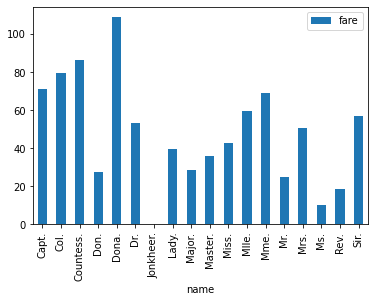

In [ ]:
# YOUR CODE HERE
#print(df)
title_fare_title = df.groupby(['title']).fare.mean()
title_fare_title.plot(kind='bar',label='fare')
plt.legend()
plt.xlabel('name')
plt.show()

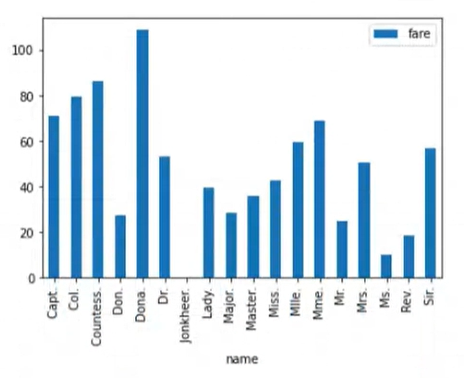

## Problem 6. (15 pts)
### Compute the confidence and support for the following cases:

Confidences:
- P(survived = 1 | sex=female, pclass=1)
- P(survived = 1 | sex=female, pclass=2)
- P(survived = 1 | sex=female, pclass=3)
- P(survived = 1 | sex=male, pclass=1)
- P(survived = 1 | sex=male, pclass=2)
- P(survived = 1 | sex=male, pclass=3)
- P(survived = 1 | age <= 10, pclass=1)
- P(survived = 1 | age <= 10, pclass=2)
- P(survived = 1 | age <= 10, pclass=3)

Support:
- P(survived = 1, sex=female, pclass=1)
- P(survived = 1, sex=female, pclass=2)
- P(survived = 1, sex=female, pclass=3)
- P(survived = 1, sex=male, pclass=1)
- P(survived = 1, sex=male, pclass=2)
- P(survived = 1, sex=male, pclass=3)
- P(survived = 1, age <= 10, pclass=1)
- P(survived = 1, age <= 10, pclass=2)
- P(survived = 1, age <= 10, pclass=3)

### 6.1 P(survived = 1 | sex=female, pclass=1), P(survived = 1, sex=female, pclass=1)

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)

cond1 = df.sex == 'female'
cond2 = df.pclass == 1
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | sex=female, pclass=1) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, sex=female, pclass=1) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53 %
Support: P(survived = 1, sex=female, pclass=1) = 10.62 %


```
Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53%
Support: P(survived = 1, sex=female, pclass=1) = 10.62%
```

### 6.2 P(survived = 1 | sex=female, pclass=2), P(survived = 1, sex=female, pclass=2)

In [ ]:
# YOUR CODE HERE
cond1 = df.sex == 'female'
cond2 = df.pclass == 2
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | sex=female, pclass=2) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, sex=female, pclass=2) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68 %
Support: P(survived = 1, sex=female, pclass=2) = 7.18 %


```
Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68%
Support: P(survived = 1, sex=female, pclass=2) = 7.18%
```

### 6.3 P(survived = 1 | sex=female, pclass=3), P(survived = 1, sex=female, pclass=3)

In [ ]:
# YOUR CODE HERE
cond1 = df.sex == 'female'
cond2 = df.pclass == 3
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | sex=female, pclass=3) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, sex=female, pclass=3) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07 %
Support: P(survived = 1, sex=female, pclass=3) = 8.1 %


```
Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07%
Support: P(survived = 1, sex=female, pclass=3) = 8.10%
```

### 6.4 P(survived = 1 | sex=male, pclass=1), P(survived = 1, sex=male, pclass=1)

In [ ]:
# YOUR CODE HERE
cond1 = df.sex == 'male'
cond2 = df.pclass == 1
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | sex=male, pclass=1) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, sex=male, pclass=1) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08 %
Support: P(survived = 1, sex=male, pclass=1) = 4.66 %


```
Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08%
Support: P(survived = 1, sex=male, pclass=1) = 4.66%
```

### 6.5 P(survived = 1 | sex=male, pclass=2), P(survived = 1, sex=male, pclass=2)

In [ ]:
# YOUR CODE HERE
cond1 = df.sex == 'male'
cond2 = df.pclass == 2
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | sex=male, pclass=2) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, sex=male, pclass=2) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62 %
Support: P(survived = 1, sex=male, pclass=2) = 1.91 %


```
Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62%
Support: P(survived = 1, sex=male, pclass=2) = 1.91%
```

### 6.6 P(survived = 1 | sex=male, pclass=3), P(survived = 1, sex=male, pclass=3)

In [ ]:
# YOUR CODE HERE
cond1 = df.sex == 'male'
cond2 = df.pclass == 3
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | sex=male, pclass=3) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, sex=male, pclass=3) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21 %
Support: P(survived = 1, sex=male, pclass=3) = 5.73 %


```
Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21%
Support: P(survived = 1, sex=male, pclass=3) = 5.73%
```

### 6.7 P(survived = 1 | age <= 10, pclass=1), P(survived = 1,  age <= 10, pclass=1)

In [ ]:
# YOUR CODE HERE
cond1 = df.age <= 10
cond2 = df.pclass == 1
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | age <= 10, pclass=1) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, age <= 10, pclass=1) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.0 %
Support: P(survived = 1, age <= 10, pclass=1) = 0.23 %


```
Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.00%
Support: P(survived = 1, age <= 10, pclass=1) = 0.23%
```

### 6.8 P(survived = 1 | age <= 10, pclass=2), P(survived = 1,  age <= 10, pclass=2)

In [ ]:
# YOUR CODE HERE
cond1 = df.age <= 10
cond2 = df.pclass == 2
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | age <= 10, pclass=2) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, age <= 10, pclass=2) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.0 %
Support: P(survived = 1, age <= 10, pclass=2) = 1.68 %


```
Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.00%
Support: P(survived = 1, age <= 10, pclass=2) = 1.68%
```

### 6.9 P(survived = 1 | age <= 10, pclass=3), P(survived = 1,  age <= 10, pclass=3)

In [ ]:
# YOUR CODE HERE
cond1 = df.age <= 10
cond2 = df.pclass == 3
cont3 = df.survived == 1
print('Confidence: P(survived = 1 | age <= 10, pclass=3) =', 
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df.loc[(cond1) & (cond2)]) * 100, 2), '%')
print('Support: P(survived = 1, age <= 10, pclass=3) =',
      round(len(df.loc[(cont3) & (cond1) & (cond2)]) / len(df) * 100, 2), '%')

Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67 %
Support: P(survived = 1, age <= 10, pclass=3) = 1.91 %


```
Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67%
Support: P(survived = 1, age <= 10, pclass=3) = 1.91%
```

### 6.10 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)

전체적으로 보았을 때 성별로 분석하면 여성의 생존률이 높았다.
3등급에 탄 여성이 1등급에 탄 남성보다 생존률이 높을 정도이다. 여성이라는 그룹에서 등급을 따져보면 1등급에 탄 여성들은 거의 100%에 가까운 확률로 생존했지만 3등급에 탄 여성을 보면 거의 50% 정도로 생존률이 절반씩이나 차이난다. 그에 비해 남성은 1등급에 탄 남성이 34% 정도로 높긴하지만 여성에 비하면 현저히 낮은 수치이고, 2-3등급에 탄 남성들은 1등급에 탄 남성에 비해 거의 절반정도씩이나 생존을 하지 못했다. 10살 이하의 탑승객들의 생존률을 보면 오히려 1등급에 탄 아이보다 2등급에 탄 아이가 더 생존률이 높은 것을 볼 수 있는데, 사실 전체 탑승객을 보았을 때에 아이들의 비율은 아주 적기 때문에 탑승 등급과 연관짓기에는 무리가 있다.


## Problem 7. (10 pts)
### 7.1 Plot numbers of survived and numbers of dead by passenger classes

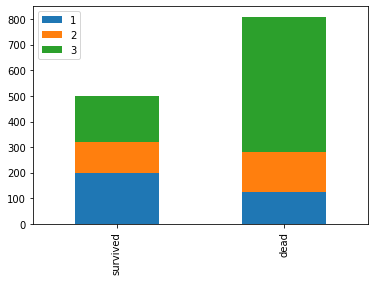

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)

survived_df = df[df.survived == 1] #survived 만 있는 df
dead_df = df[df.survived == 0] #dead만 있는 df

df = pd.DataFrame({'1': [len(survived_df.loc[(survived_df.pclass == 1)]), len(dead_df.loc[(dead_df.pclass == 1)])],
                  '2': [len(survived_df.loc[(survived_df.pclass == 2)]), len(dead_df.loc[(dead_df.pclass == 2)])],
                  '3': [len(survived_df.loc[(survived_df.pclass == 3)]), len(dead_df.loc[(dead_df.pclass == 3)])]}, 
                  index=['survived','dead'])
df.plot.bar(rot=90, stacked=True)
plt.show()

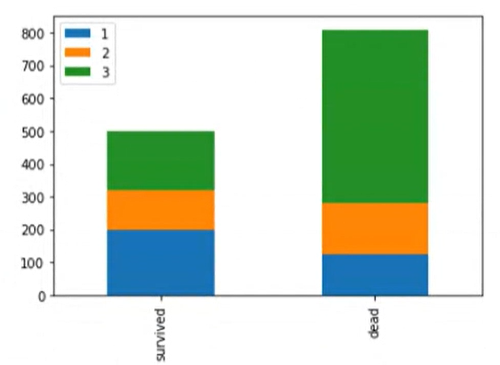

### 7.2 Plot numbers of survived and numbers of dead by passenger age intervals
-  0:   0 $\le$ age $\lt$ 20
- 20: 20 $\le$ age $\lt$ 40
- 40: 40 $\le$ age $\lt$ 60
- 60: 60 $\le$ age $\lt$ 80
- 80: 80 $\le$ age

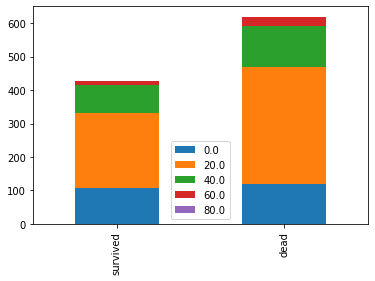

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)

survived_df = df[df.survived == 1] #survived 만 있는 df
dead_df = df[df.survived == 0] #dead만 있는 df

df = pd.DataFrame({'0.0': [len(survived_df.loc[(survived_df.age >= 0) & (survived_df.age < 20)]), 
                         len(dead_df.loc[(dead_df.age >= 0) & (dead_df.age < 20)])],
                  '20.0': [len(survived_df.loc[(survived_df.age >= 20) & (survived_df.age < 40)]), 
                         len(dead_df.loc[(dead_df.age >= 20) & (dead_df.age < 40)])],
                  '40.0': [len(survived_df.loc[(survived_df.age >= 40) & (survived_df.age < 60)]), 
                         len(dead_df.loc[(dead_df.age >= 40) & (dead_df.age < 60)])],
                   '60.0': [len(survived_df.loc[(survived_df.age >= 60) & (survived_df.age < 80)]), 
                         len(dead_df.loc[(dead_df.age >= 60) & (dead_df.age < 80)])],
                   '80.0': [len(survived_df.loc[(survived_df.age >= 80)]), 
                         len(dead_df.loc[(dead_df.age >= 80)])]}, 
                  index=['survived','dead'])
df.plot.bar(rot=90, stacked=True)
plt.show()

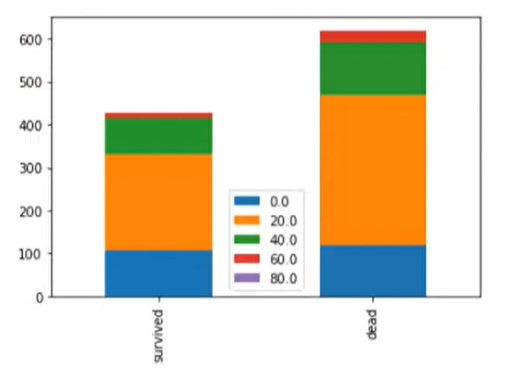

### 7.3 Plot numbers of survived and numbers of dead by the ports passenger embarked at

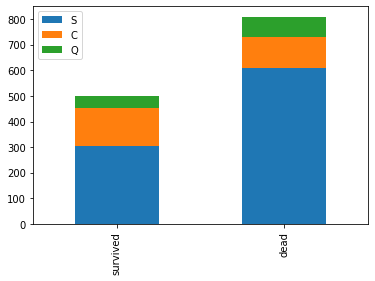

In [ ]:
# YOUR CODE HERE
df = pd.DataFrame(titanic)

survived_df = df[df.survived == 1] #survived 만 있는 df
dead_df = df[df.survived == 0] #dead만 있는 df

df = pd.DataFrame({'S': [len(survived_df.loc[(survived_df.embarked == 'S')]), len(dead_df.loc[(dead_df.embarked == 'S')])],
                  'C': [len(survived_df.loc[(survived_df.embarked == 'C')]), len(dead_df.loc[(dead_df.embarked == 'C')])],
                  'Q': [len(survived_df.loc[(survived_df.embarked == 'Q')]), len(dead_df.loc[(dead_df.embarked == 'Q')])]}, 
                  index=['survived','dead'])
df.plot.bar(rot=90, stacked=True)
plt.show()

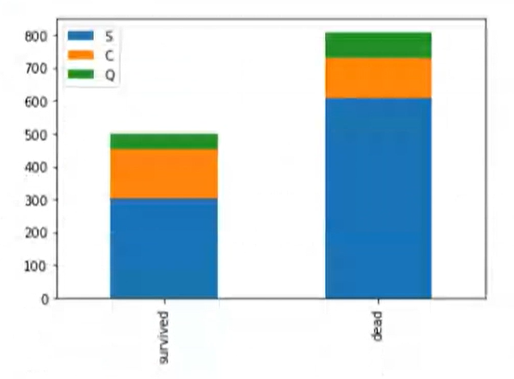

### 7.4 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)

직접 그래프로 나타내보니 탑승 등급 별로 생존률을 보았을 때 
3등급에 탄 사람들이 죽은 사람의 비율에서 절반 이상을 차지한다는 것을 한눈에 볼 수 있었다.
1,2 등급은 큰 차이가 없는 편인데 3등급의 사망 비율이 그에비해 굉장히 크다.
나이대 별로 생존률을 보았을 때 20-30대가 생존, 죽음 두 곳다 많이 차지하는 것을 보아 탑승객중
20-30대에 속하는 사람들이 일단 가장 많았음을 확인할 수 있다. 60대 이상의 탑승객은 거의 없었고
나이에 상관없이 전체적으로 보았을 때 죽은 사람의 비율이 더 많았다.
탑승객이 탄 장소를 기준으로 나누어도 보았는데 S에서 탄 사람들의 비율이 굉장히 높았음을 볼 수 있었다.
이곳에서 탑승했던 사람들이 제일 많았을 것으로 추정된다. 그에비해 Q에서 탄 사람은 매우 적다.
결국 생존한사람, 사망한 사람 모두 S에서 탄 사람들이 제일 많았다.

따로 보았을 때에는 보이지 않던 결과들을 이렇게 그래프로 여러 기준에 따라 나누어 표현해보면 새로운 분석을 시도해볼 수 있다는 것을 알게 되었다.

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_5_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills